Task 6: Threshold Tuning and Probability Interpretation 
● Predict the probability of the positive class. 
● Change the threshold (e.g., 0.3, 0.5, 0.7) and observe how the confusion matrix and F1-score change. 
● Plot the ROC curve and mark optimal threshold.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]

In [6]:
# Assuming model, X_test, y_test, and y_prob are already from Task 5
thresholds = [0.3, 0.5, 0.7]


=== Threshold = 0.3 ===
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1-score: 0.9655


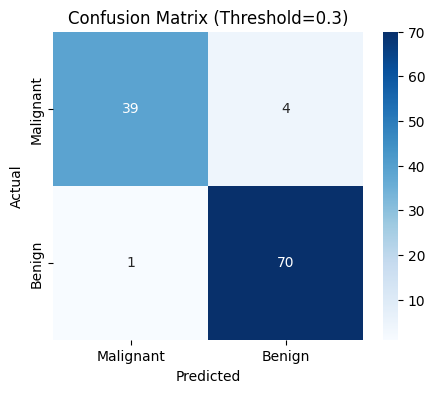


=== Threshold = 0.5 ===
Confusion Matrix:
 [[39  4]
 [ 1 70]]
F1-score: 0.9655


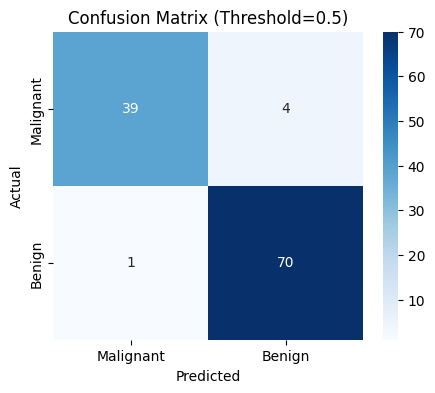


=== Threshold = 0.7 ===
Confusion Matrix:
 [[41  2]
 [ 1 70]]
F1-score: 0.979


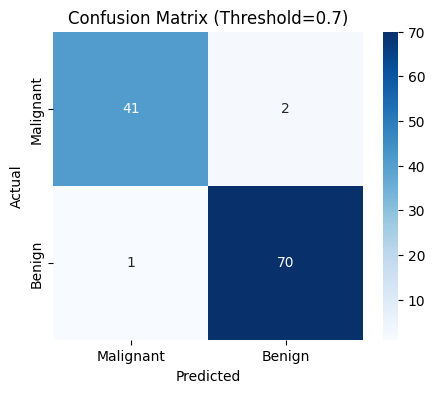

In [7]:
for thresh in thresholds:
    # Apply threshold
    y_pred_thresh = (y_prob >= thresh).astype(int)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)

    print(f"\n=== Threshold = {thresh} ===")
    print("Confusion Matrix:\n", cm)
    print("F1-score:", round(f1, 4))

    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Malignant','Benign'],
                yticklabels=['Malignant','Benign'])
    plt.title(f'Confusion Matrix (Threshold={thresh})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [8]:
# --- ROC curve and optimal threshold ---
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
youden_index = tpr - fpr
optimal_idx = np.argmax(youden_index)
optimal_threshold = roc_thresholds[optimal_idx]

print(f"\nOptimal threshold (Youden's J): {optimal_threshold:.2f}")


Optimal threshold (Youden's J): 0.85


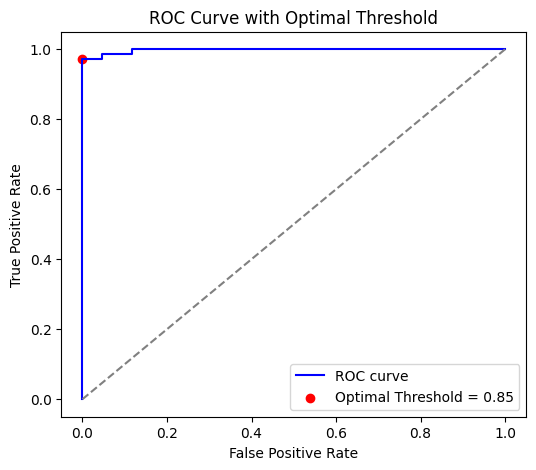

In [9]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label='ROC curve', color='blue')
plt.plot([0,1],[0,1],'--',color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx],
            color='red', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Optimal Threshold')
plt.legend()
plt.show()